<a href="https://colab.research.google.com/github/amirly2010/Automatic-Ticket-Classification-tool/blob/main/V7_merged_all_IEEEdatasets_threat_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'ieee-annotated:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4792717%2F8112936%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240605%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240605T011225Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5f879dca5b6fb9b59c0d09cd9a9ee834d2d1d1c0ed6aeae12b322757650ba341f8116eed0dbb68823efbf318fabfd1414c9c52491fa906f5f7e6c86ba2fb9fa772e6629b203c5b97b6d86ca4aebf38dd38a127e30b0abe1ed68aa650e29c93438a9ea831caa034982d4ffa1fbbd03fb056b1b32c13ae6ad745428cdd6fae7518cbc256e0f518b340969b30edd6af1501e319b746c603be300f8862a58bcaaf73c9d60c9d38deb0d4cdf2d4da36115822d0ae77394422a5838abbc4f5dbad40c336fc884fdf2695cf365e510a7c764aafd8ae5fb906ef7966c562ca7c9ae7a639af3c53e8e8a573dcaf189693f4b85cb69356bb0f173153c6a8fcb77ff1210abf,oensive-tweet:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4793617%2F8114118%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240605%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240605T011225Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9d96e46f8bacaa8566c558bf8cfdb700f52968ac27eeedbb893061ffb7708667fc724046f434311aa62643bad6ec55baff054fa66921714c12741b61bd916413bbb3a4e3cea2cb0c7b0500163288c8bb1cb117aa83a9d2fe8b899625b5d1850a8c6ce89c86105bb4f6f02e11bc33dfce0ec3cd0c6e301ac0d22d1a8bfbf36ab278eada0a3355301d58f489d9143974f060f48b8928b062c05ac31b6fda553267623960ff8fde34a6b736a24b295ea032acac207a618e0c850c6c419b5d0e6767acc9ca1c41cf4bde3f3bb9dd1822514a6de784332bdf1bc60a22d6b360b4aae81326633836259bb9c436de2fce8e8844c91e30a2177c7d49f6fa365f97ca6ea7,llama-3/transformers/8b-chat-hf/1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F28083%2F33551%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240605%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240605T011225Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2395bdc69e90b6113bb242fd8543266756e18ab8558238cb7e8a35681653b14a0ced6724ed7626de3846d3e0714c43c0c7e68356aa8e75766e92304c6833828144b085cba5b2ac10b39e92b7d29cd32cf634cc9c9ba8fd97ef21d52bec1cebaa6b0bc9a7873ad2ad5858929aab5a9f859805e9a7a8d17f20d708515f8aad4ff312ccaeeff421b40557e0f00baea34dbeae18ddbee0cde4f4cd3c26317284010a5c51a0ca37a1b71dda0c9a0b27f3bb328c6dcab6091f1f8d055dd4b7e4230c9dc0d2a7b4fd327645a0f9457dbd322646fba639a7a5d02763fb48e9cf7e499569349443b178e81a5d3b8e922bd7bb430785711746ea9904066ebb8515af5a6a3b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


## Fine-tune Llama 2 for Sentiment Analysis

For this hands-on tutorial on fine-tuning a Llama 2 model, I am going to deal with a sentiment analysis on financial and economic information. Sentiment analysis on financial and economic information is highly relevant for businesses for several key reasons, ranging from market insights (gain valuable insights into market trends, investor confidence, and consumer behavior) to risk management (identifying potential reputational risks) to investment decisions (gauging the sentiment of stakeholders, investors, and the general public businesses can assess the potential success of various investment opportunities).

Before the technicalities of fine-tuning a large language model like Llama 2, we have to find the correct dataset to demonstrate the potentialities of fine-tuning.

Particularly within the realm of finance and economic texts, annotated datasets are notably rare, with many being exclusively reserved for proprietary purposes. To address the issue of insufficient training data, scholars from the Aalto University School
of Business introduced in 2014 a set of approximately 5000 sentences. This collection aimed to establish human-annotated benchmarks, serving as a standard for evaluating alternative modeling techniques. The involved annotators (16 people with
adequate background knowledge on financial markets) were instructed to assess the sentences solely from the perspective of an investor, evaluating whether the news potentially holds a positive, negative, or neutral impact on the stock price.

The FinancialPhraseBank dataset is a comprehensive collection that captures the sentiments of financial news headlines from the viewpoint of a retail investor. Comprising two key columns, namely "Sentiment" and "News Headline," the dataset effectively classifies sentiments as either negative, neutral, or positive. This structured dataset serves as a valuable resource for analyzing and understanding the complex dynamics of sentiment in the domain of financial news. It has been used in various studies and research initiatives, since its inception in the work by Malo, P., Sinha, A., Korhonen, P., Wallenius, J., and Takala, P.  "Good debt or bad debt: Detecting semantic orientations in economic texts.", published in the Journal of the Association for Information Science and Technology in 2014.

As a first step, we install the specific libraries necessary to make this example work.

* accelerate is a distributed training library for PyTorch by HuggingFace. It allows you to train your models on multiple GPUs or CPUs in parallel (distributed configurations), which can significantly speed up training in presence of multiple GPUs (we won't use it in our example).
* peft is a Python library by HuggingFace for efficient adaptation of pre-trained language models (PLMs) to various downstream applications without fine-tuning all the model's parameters. PEFT methods only fine-tune a small number of (extra) model parameters, thereby greatly decreasing the computational and storage costs.
* bitsandbytes by Tim Dettmers, is a lightweight wrapper around CUDA custom functions, in particular 8-bit optimizers, matrix multiplication (LLM.int8()), and quantization functions. It allows to run models stored in 4-bit precision: while 4-bit bitsandbytes stores weights in 4-bits, the computation still happens in 16 or 32-bit and here any combination can be chosen (float16, bfloat16, float32, and so on).
* transformers is a Python library for natural language processing (NLP). It provides a number of pre-trained models for NLP tasks such as text classification, question answering, and machine translation.
* trl is a full stack library by HuggingFace providing a set of tools to train transformer language models with Reinforcement Learning, from the Supervised Fine-tuning step (SFT), Reward Modeling step (RM) to the Proximal Policy Optimization (PPO) step.

In [ ]:

print("IEEE_annotated---------------------------------")

import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("/kaggle/input/ieee-annotated/IEEE_annotated.csv")

# Filter rows where the "annotation" column is 'threat' or 'irrelevant'
filtered_data = df[df['annotation'].isin(['threat', 'irrelevant', "unknown"])]

# Select only the lowercase values from the "type" column
filtered_data = filtered_data[filtered_data['type'].str.islower()]

# Define a function to format labels based on annotation
def format_label(annotation, label):
    if annotation == 'threat':
        return 'threat'
    elif annotation == 'irrelevant':
        return 'irrelevant'
    else:
        return 'unknown'

# Apply the format_label function to create the "label" column
filtered_data['label'] = filtered_data.apply(lambda row: format_label(row['annotation'], row['type']), axis=1)

# Select only the specific labels
selected_labels = [
    'irrelevant',
    'threat',
    'unknown'
]
final_data = filtered_data[filtered_data['label'].isin(selected_labels)]

# Select only the "text" and "label" columns
final_data = final_data[['text', 'label']]

# Count occurrences of each label
label_counts = final_data['label'].value_counts()

# Display label counts
print(label_counts)

# Save final data to CSV
final_data.to_csv("/kaggle/working/final_data.csv", index=False)

# Display sample of the final data
print(final_data.head())

print("Oﬀensive_tweets---------------------------------")

import pandas as pd

# Load the dataset into a DataFrame
df2 = pd.read_csv("/kaggle/input/oensive-tweet/Oensive_tweets.csv")

# Count occurrences of each label
df2_counts = df2['is_off'].value_counts()

# Display label counts
print(df2_counts)

# Filter rows where "is_off" is 1 and select only 2000 rows
offensive_data = df2[df2['is_off'] == 1].head(500)

# Drop the 'id' column
offensive_data = offensive_data.drop(columns=['user_id'])

# Rename the columns
offensive_data = offensive_data.rename(columns={"is_off": "label", "content": "text"})

# Rename the value 1 in the "label" column to "threat: 'Offensive_Language'"
offensive_data['label'] = "threat"

# Count occurrences of each label
offensive_data_counts = offensive_data['label'].value_counts()

# Display label counts
print(offensive_data_counts)

print(offensive_data.head())

# Save the final DataFrame to a CSV file
offensive_data.to_csv("final_offensive_data.csv", index=False)

print("merge IEEE_annotated-Oﬀensive_tweets---------------------------------")

import pandas as pd

# Load the first dataset (final_data)
final_data_df = pd.read_csv("/kaggle/working/final_data.csv")

# Load the second dataset (offensive_data)
offensive_data_df = pd.read_csv("/kaggle/working/final_offensive_data.csv")

# Rename columns in offensive_data
offensive_data_df = offensive_data_df[offensive_data_df['label'] == "threat"].head(500)
offensive_data_df = offensive_data_df.rename(columns={"label": "label", "text": "text"})
offensive_data_df['label'] = "threat"

# Concatenate the two dataframes vertically
merged_data = pd.concat([final_data_df, offensive_data_df], ignore_index=True)

# Save the final DataFrame to a CSV file
merged_data.to_csv("merge_IEEE_annotated_Oﬀensive_tweets.csv", index=False)

# Count occurrences of each label
label_counts = merged_data['label'].value_counts()

# Display label counts
print(label_counts)



# print("IEEE_annotated---------------------------------")

# import pandas as pd

# # Load the CSV file into a DataFrame
# df = pd.read_csv("/kaggle/input/ieee-annotated/IEEE_annotated.csv")

# # Filter rows where the "annotation" column is 'threat' or 'irrelevant'
# filtered_data = df[df['annotation'].isin(['threat', 'irrelevant', "unknown"])]

# # Select only the lowercase values from the "type" column
# filtered_data = filtered_data[filtered_data['type'].str.islower()]

# # Define a function to format labels based on annotation
# def format_label(annotation, label):
#     if annotation == 'threat':
#         return f"threat: {label.strip('[]').lower()}"
#     elif annotation == 'irrelevant':
#         return 'irrelevant'
#     else:
#         return 'unknown'

# # Apply the format_label function to create the "label" column
# filtered_data['label'] = filtered_data.apply(lambda row: format_label(row['annotation'], row['type']), axis=1)

# # Select only the specific labels
# selected_labels = [
#     'irrelevant',
#     "threat: 'vulnerability'",
#     "threat: 'general'",
#     "threat: 'ransomware'",
#     "threat: 'ddos'",
#     "threat: 'botnet'",
#     'unknown'
# ]
# final_data = filtered_data[filtered_data['label'].isin(selected_labels)]

# # Select only the "text" and "label" columns
# final_data = final_data[['text', 'label']]

# # Count occurrences of each label
# label_counts = final_data['label'].value_counts()

# # Display label counts
# print(label_counts)

# # Save final data to CSV
# final_data.to_csv("/kaggle/working/final_data.csv", index=False)

# # Display sample of the final data
# print(final_data.head())



# print("Oﬀensive_tweets---------------------------------")


# import pandas as pd

# # Load the dataset into a DataFrame
# df2 = pd.read_csv("/kaggle/input/oensive-tweet/Oensive_tweets.csv")

# # Count occurrences of each label
# df2_counts = df2['is_off'].value_counts()

# # Display label counts
# print(df2_counts)

# # Filter rows where "is_off" is 1 and select only 2000 rows
# offensive_data = df2[df2['is_off'] == 1].head(500)

# # Drop the 'id' column
# offensive_data = offensive_data.drop(columns=['user_id'])

# # Rename the columns
# offensive_data = offensive_data.rename(columns={"is_off": "label", "content": "text"})

# # Rename the value 1 in the "label" column to "threat: 'Offensive_Language'"
# offensive_data['label'] = "threat: 'Offensive_Language'"

# # Count occurrences of each label
# offensive_data_counts = offensive_data['label'].value_counts()

# # Display label counts
# print(offensive_data_counts)

# print(offensive_data.head())

# # Save the final DataFrame to a CSV file
# offensive_data.to_csv("final_offensive_data.csv", index=False)

# print("merge IEEE_annotated-Oﬀensive_tweets---------------------------------")

# import pandas as pd

# # Load the first dataset (final_data)
# final_data_df = pd.read_csv("/kaggle/working/final_data.csv")

# # Load the second dataset (offensive_data)
# offensive_data_df = pd.read_csv("/kaggle/working/final_offensive_data.csv")

# # Rename columns in offensive_data
# offensive_data_df = offensive_data_df[offensive_data_df['label'] == "threat: 'Offensive_Language'"].head(500)
# offensive_data_df = offensive_data_df.rename(columns={"label": "label", "text": "text"})
# offensive_data_df['label'] = "threat: 'Offensive_Language'"

# # Concatenate the two dataframes vertically
# merged_data = pd.concat([final_data_df, offensive_data_df], ignore_index=True)


# # Save the final DataFrame to a CSV file
# merged_data.to_csv("merge_IEEE_annotated_Oﬀensive_tweets.csv", index=False)

# # Count occurrences of each label
# label_counts = merged_data['label'].value_counts()

# # Display label counts
# print(label_counts)

IEEE_annotated---------------------------------
label
threat        7563
irrelevant    6533
unknown       4156
Name: count, dtype: int64
                                                 text       label
4   Data leak from Huazhu Hotels may affect 130 mi...      threat
6   (good slides): \n\nThe Advanced Exploitation o...      threat
7   CVE-2018-1000532 (beep)\nhttps://t.co/CaKbo38U...      threat
8   Will upload some of yesterday's videos which d...      threat
10  You can’t get to courage without walking throu...  irrelevant
Oﬀensive_tweets---------------------------------
is_off
0    11772
1     1008
Name: count, dtype: int64
label
threat    500
Name: count, dtype: int64
                                                  text   label
1    Great to see #Qatar reject #China #Xinjiang wh...  threat
235  @karaswisher: He really is vile. \n\nhttps://t...  threat
353  Fascinating uptick in political momentum to co...  threat
485  @JayCarney: If you can’t compete with lower pr...  threat
48

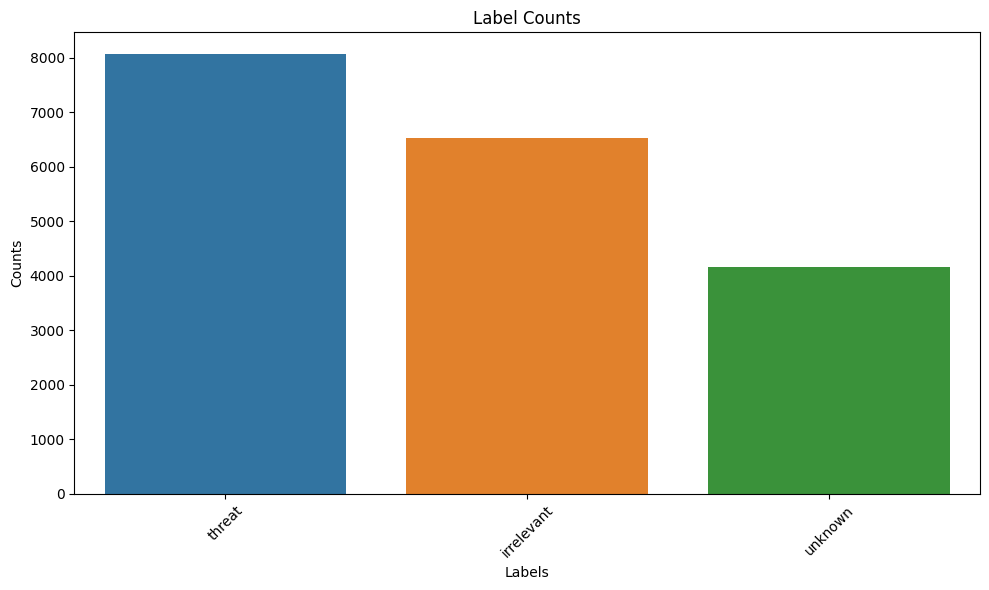

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Label Counts')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# # Plot using Seaborn pie chart
# plt.figure(figsize=(8, 8))
# plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
# plt.title('Label Distribution')
# plt.axis('equal')
# plt.show()


## Installations and imports

In [ ]:
# # for empty the output path
# import shutil
# shutil.rmtree("/kaggle/working/")

In [ ]:
!pip install -q -U "torch==2.1.2" tensorboard

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.
tensorflow 2.15.0 requires tensorboard<2.16,>=2.15, but you have tensorboard 2.16.2 which is incompatible.


In [ ]:
!pip install -q -U "transformers==4.36.2" "datasets==2.16.1" "accelerate==0.26.1" "bitsandbytes==0.42.0"

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cubinlinker, which is not installed.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 23.8.0 requires ptxcompiler, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 15.0.2 which is incompatible.
cudf 23.8.0 requires cuda-python<12.0a0,>=11.7.1, but you have cuda-python 12.4.0 which is incompatible.
cudf 23.8.0 requires pandas<1.6.0dev0,>=1.3, but you have pandas 2.1.4 which is incompatible.
cudf

In [ ]:
!pip -q install evaluate

The code imports the os module and sets two environment variables:
* CUDA_VISIBLE_DEVICES: This environment variable tells PyTorch which GPUs to use. In this case, the code is setting the environment variable to 0, which means that PyTorch will use the first GPU.
* TOKENIZERS_PARALLELISM: This environment variable tells the Hugging Face Transformers library whether to parallelize the tokenization process. In this case, the code is setting the environment variable to false, which means that the tokenization process will not be parallelized.

In [ ]:
!pip install -q -U git+https://github.com/huggingface/trl@a3c5b7178ac4f65569975efadc97db2f3749c65e
!pip install -q -U git+https://github.com/huggingface/peft@4a1559582281fc3c9283892caea8ccef1d6f5a4f

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["TOKENIZERS_PARALLELISM"] = "false"

The code import warnings; warnings.filterwarnings("ignore") imports the warnings module and sets the warning filter to ignore. This means that all warnings will be suppressed and will not be displayed. Actually during training there are many warnings that do not prevent the fine-tuning but can be distracting and make you wonder if you are doing the correct things.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In the following cell there are all the other imports for running the notebook

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import bitsandbytes as bnb
import torch
import torch.nn as nn
import transformers
from peft import LoraConfig, PeftConfig
from trl import SFTTrainer
from trl import setup_chat_format
from transformers import (AutoModelForCausalLM,
                          AutoTokenizer,
                          BitsAndBytesConfig,
                          TrainingArguments,
                          pipeline,
                          logging)
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             confusion_matrix)
from sklearn.model_selection import train_test_split
from datasets import Dataset


2024-04-23 10:07:30.118449: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 10:07:30.118560: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 10:07:30.256193: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
print(f"pytorch version {torch.__version__}")

pytorch version 2.1.2


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"working on {device}")

working on cuda:0


## Preparing the data and the core evaluation functions

The code in the next cell performs the following steps:

1. Reads the input dataset from the all-data.csv file, which is a comma-separated value (CSV) file with two columns: sentiment and text.
2. Splits the dataset into training and test sets, with 300 samples in each set. The split is stratified by sentiment, so that each set contains a representative sample of positive, neutral, and negative sentiments.
3. Shuffles the train data in a replicable order (random_state=10)
4. Transforms the texts contained in the train and test data into prompts to be used by Llama: the train prompts contains the expected answer we want to fine-tune the model with
5. The residual examples not in train or test, for reporting purposes during training (but it won't be used for early stopping), is treated as evaluation data, which is sampled with repetition in order to have a 50/50/50 sample (negative instances are very few, hence they should be repeated)
5. The train and eval data are wrapped by the class from Hugging Face (https://huggingface.co/docs/datasets/index)

This prepares in a single cell train_data, eval_data and test_data datasets to be used in our fine tuning.

In [ ]:
import pandas as pd
import re
import emoji

# Step 1: Read the dataset into a DataFrame
filename = "/kaggle/working/merge_IEEE_annotated_Oﬀensive_tweets.csv"
df = pd.read_csv(filename, encoding="utf-8", encoding_errors="replace")

# Step 2: Clean the text data
def clean_text(text):
    # Replace emojis with a placeholder to preserve their presence
    text = emoji.demojize(text, delimiters=(" ", " "))

    # Retain non-ASCII characters except for emojis
    text = re.sub(r'[^\x00-\x7F]', ' ', text)

    # Replace URLs with a placeholder to preserve their presence
    text = re.sub(r"http\S+|www\S+|https\S+", "<URL>", text)

    # Replace special characters and punctuation marks with a space
    text = re.sub(r'[\[\]\"#()\-,./:;<=>\\[\]^_`!]', ' ', text)

    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)

    return text.strip()  # Strip any leading or trailing whitespace

# Apply cleaning to the 'text' column
df['text'] = df['text'].apply(clean_text)
print(df.head())

# Step 3: Remove empty rows
df = df.dropna(subset=['text'])

# Step 4: Remove duplicate rows
df = df.drop_duplicates(subset=['text'])

# Step 5: Rename columns
df = df.rename(columns={'label': 'label'})

# Specify the file path for saving the cleaned dataset
output_filename = "/kaggle/working/cleaned_dataset_v2_IEEE_merged_data.csv"

# Save the cleaned DataFrame to a CSV file with column headers
df.to_csv(output_filename, index=False, header=True)

print(f"Cleaned dataset saved to {output_filename}")

label_counts = df['label'].value_counts()
# Print the counts
print("label counts:")
print(label_counts)


# import pandas as pd
# import re
# import numpy as np
# from datasets import Dataset


# # Step 1: Read the dataset into a DataFrame
# filename = "/kaggle/working/merge_IEEE_annotated_Oﬀensive_tweets.csv"
# df = pd.read_csv(filename, encoding="utf-8", encoding_errors="replace")

# # Step 2: Clean the text data

# def clean_text(text):
#     # Remove URLs
#     text = re.sub(r"http\S+|www\S+|https\S+", "", text)

#     # Remove non-ASCII characters (including emojis)
#     text = re.sub(r'[^\x00-\x7F]+', '', text)

#     # Remove punctuation except for apostrophes
#     text = re.sub(r'[^\w\s\']', '', text)

#     # Replace multiple spaces with a single space
#     text = re.sub(r'\s+', ' ', text)

#     return text.strip()  # Strip any leading or trailing whitespace


# # Apply cleaning to the 'text' column
# df['text'] = df['text'].apply(clean_text)
# print(df.head())

# # Step 3: Remove empty rows
# df = df.dropna(subset=['text'])

# # Step 4: Remove duplicate rows
# df = df.drop_duplicates(subset=['text'])

# # Step 5: Rename columns
# df = df.rename(columns={'label': 'label'})

# # Filter out rows with label "unknown"
# df = df[df['label'] != 'unknown']

# ## without label (Unknown)
# # Specify the file path for saving the cleaned dataset
# output_filename = "/kaggle/working/cleaned_dataset_v2_IEEE_merged_data.csv"

# # Save the cleaned DataFrame to a CSV file without including the column names in the first row
# df.to_csv(output_filename, index=False, header=False)

# print(f"Cleaned dataset saved to {output_filename}")

# print(df.head())

# label_counts = df['label'].value_counts()
# # Print the counts
# print("label counts:")
# print(label_counts)

## with label (Unknown)
# # Specify the file path for saving the cleaned dataset
# output_filename = "/kaggle/working/cleaned_dataset_v2_IEEE_merged_data.csv"

# # Save the cleaned DataFrame to a CSV file without including the column names in the first row
# df.to_csv(output_filename, index=False, header=False)

# print(f"Cleaned dataset saved to {output_filename}")

# print(df.head())

# label_counts = df['label'].value_counts()
# # Print the counts
# print("label counts:")
# print(label_counts)

                                                text       label
0  Data leak from Huazhu Hotels may affect 130 mi...      threat
1  good slides The Advanced Exploitation of 64 bi...      threat
2  CVE 2018 1000532 beep URL beep version 1 3 and...      threat
3  Will upload some of yesterday's videos which d...      threat
4  You can t get to courage without walking throu...  irrelevant
Cleaned dataset saved to /kaggle/working/cleaned_dataset_v2_IEEE_merged_data.csv
label counts:
label
threat        6159
irrelevant    5824
unknown       3284
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

X_train = list()
X_test = list()

for label in ["irrelevant", "threat", "unknown"]:
    train, test  = train_test_split(df[df.label==label],
                                    train_size=0.85,
                                    test_size=0.10,
                                    random_state=42)
    X_train.append(train)
    X_test.append(test)

X_train = pd.concat(X_train).sample(frac=1, random_state=10)
X_test = pd.concat(X_test)

eval_idx = [idx for idx in df.index if idx not in list(X_train.index) + list(X_test.index)]
X_eval = df[df.index.isin(eval_idx)]
X_eval = (X_eval
          .groupby('label', group_keys=False)
          .apply(lambda x: x.sample(n=100, random_state=10, replace=True)))
X_train = X_train.reset_index(drop=True)

# Count occurrences of labels in each dataset
train_label_counts = X_train['label'].value_counts()
test_label_counts = X_test['label'].value_counts()
eval_label_counts = X_eval['label'].value_counts()

# Print the counts
print("Train label counts:")
print(train_label_counts)

print("\nTest label counts:")
print(test_label_counts)

print("\nEvaluation label counts:")
print(eval_label_counts)


# Define prompt generation functions
def generate_prompt(data_point):
    return f"""
            You are an intelligent chatbot. Analyze the following text and return the answer as the corresponding label "irrelevant" or "threat" or "unknown".

            [{data_point["text"]}] = {data_point["label"]}
            """.strip()

def generate_test_prompt(data_point):
    return f"""
            You are an intelligent chatbot. Analyze the following text and return the answer as the corresponding label "irrelevant" or "threat" or "unknown".

            [{data_point["text"]}] = """.strip()

X_train = pd.DataFrame(X_train.apply(generate_prompt, axis=1),
                       columns=["text"])
X_eval = pd.DataFrame(X_eval.apply(generate_prompt, axis=1),
                      columns=["text"])

y_true = X_test.label
X_test = pd.DataFrame(X_test.apply(generate_test_prompt, axis=1), columns=["text"])

train_data = Dataset.from_pandas(X_train)
eval_data = Dataset.from_pandas(X_eval)

# Print dataset shapes and preview
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of X_eval:", X_eval.shape)

print("X_train:")
print(X_train.head())

print("X_test:")
print(X_test.head())

print("X_eval:")
print(X_eval.head())

print("===============================================================")
# Assuming you want to print text from the first cell of X_train
print(X_train.iloc[0][0])
print("===============================================================")

print(X_test.iloc[0][0])
print("===============================================================")

print(X_eval.iloc[0][0])


Train label counts:
label
threat        5235
irrelevant    4950
unknown       2791
Name: count, dtype: int64

Test label counts:
label
threat        616
irrelevant    583
unknown       329
Name: count, dtype: int64

Evaluation label counts:
label
irrelevant    100
threat        100
unknown       100
Name: count, dtype: int64
Shape of X_train: (12976, 1)
Shape of X_test: (1528, 1)
Shape of X_eval: (300, 1)
X_train:
                                                text
0  You are an intelligent chatbot. Analyze the fo...
1  You are an intelligent chatbot. Analyze the fo...
2  You are an intelligent chatbot. Analyze the fo...
3  You are an intelligent chatbot. Analyze the fo...
4  You are an intelligent chatbot. Analyze the fo...
X_test:
                                                    text
14389  You are an intelligent chatbot. Analyze the fo...
7223   You are an intelligent chatbot. Analyze the fo...
5047   You are an intelligent chatbot. Analyze the fo...
5707   You are an intelligen

In [ ]:
def evaluation(y_true, y_pred):
    labels = ["unknown", "irrelevant", "threat"]
    mapping = {"unknown": 0, "irrelevant": 1, "threat": 2}
    def map_func(x):
        return mapping.get(x, 0)

    y_true = np.vectorize(map_func)(y_true)
    y_pred = np.vectorize(map_func)(y_pred)

    # Calculate accuracy
    accuracy = accuracy_score(y_true=y_true, y_pred=y_pred)
    print(f'Accuracy: {accuracy:.3f}')

    # Generate accuracy report
    unique_labels = set(y_true)  # Get unique labels

    for label in unique_labels:
        label_indices = [i for i in range(len(y_true))
                         if y_true[i] == label]
        label_y_true = [y_true[i] for i in label_indices]
        label_y_pred = [y_pred[i] for i in label_indices]
        accuracy = accuracy_score(label_y_true, label_y_pred)
        print(f'Accuracy for label {label}: {accuracy:.3f}')

    # Generate classification report
    class_report = classification_report(y_true=y_true, y_pred=y_pred)
    print('\nClassification Report:')
    print(class_report)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=[0, 1, 2])
    print('\nConfusion Matrix:')
    print(conf_matrix)


In [ ]:
import numpy as np
from evaluate import load
from sklearn.metrics import f1_score

# f1_score_2 = load("f1")

# def compute_metrics(eval_pred):
#     predictions, labels = eval_pred
#     predictions = np.argmax(predictions, axis=1)
#     return f1_score_2.compute(predictions=predictions, references=labels, average='weighted')

# Example usage:
# eval_pred = (predictions, labels)
# metrics = compute_metrics(eval_pred)
# print(metrics)
# Setup evaluation

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

Next we create a function to evaluate the results from our fine-tuned sentiment model. The function performs the following steps:

1. Maps the sentiment labels to a numerical representation, where 2 represents positive, 1 represents neutral, and 0 represents negative.
2. Calculates the accuracy of the model on the test data.
3. Generates an accuracy report for each sentiment label.
4. Generates a classification report for the model.
5. Generates a confusion matrix for the model.

## Testing the model without fine-tuning

Next we need to take care of the model, which is a 7b-hf (7 billion parameters, no RLHF, in the HuggingFace compatible format), loading from Kaggle models and quantization.

Model loading and quantization:

* First the code loads the Llama-2 language model from the Hugging Face Hub.
* Then the code gets the float16 data type from the torch library. This is the data type that will be used for the computations.
* Next, it creates a BitsAndBytesConfig object with the following settings:
    1. load_in_4bit: Load the model weights in 4-bit format.
    2. bnb_4bit_quant_type: Use the "nf4" quantization type. 4-bit NormalFloat (NF4), is a new data type that is information theoretically optimal for normally distributed weights.
    3. bnb_4bit_compute_dtype: Use the float16 data type for computations.
    4. bnb_4bit_use_double_quant: Do not use double quantization (reduces the average memory footprint by quantizing also the quantization constants and saves an additional 0.4 bits per parameter.).
* Then the code creates a AutoModelForCausalLM object from the pre-trained Llama-2 language model, using the BitsAndBytesConfig object for quantization.
* After that, the code disables caching for the model.
* Finally the code sets the pre-training token probability to 1.

Tokenizer loading:

* First, the code loads the tokenizer for the Llama-2 language model.
* Then it sets the padding token to be the end-of-sequence (EOS) token.
* Finally, the code sets the padding side to be "right", which means that the input sequences will be padded on the right side. This is crucial for correct padding direction (this is the way with Llama 2).

In [ ]:
# for empty the output path
import shutil
shutil.rmtree("/kaggle/working/")

In [ ]:
import gc

for _ in range(100):
    torch.cuda.empty_cache()
    gc.collect()

In [ ]:
import bitsandbytes as bnb


# model_name = "meta-llama/Llama-2-7b-hf"
model_name = "/kaggle/input/llama-3/transformers/8b-chat-hf/1"


compute_dtype = getattr(torch, "float16")

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=True,
)

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map=device,
    torch_dtype=compute_dtype,
    quantization_config=bnb_config,
)

model.config.use_cache = False
model.config.pretraining_tp = 1

tokenizer = AutoTokenizer.from_pretrained(model_name,
                                          trust_remote_code=True,
                                         )
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

model, tokenizer = setup_chat_format(model, tokenizer)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In the next cell, we set a function for predicting the sentiment of a news headline using the Llama-2 language model. The function takes three arguments:

test: A Pandas DataFrame containing the news headlines to be predicted.
model: The pre-trained Llama-2 language model.
tokenizer: The tokenizer for the Llama-2 language model.

The function works as follows:

1. For each news headline in the test DataFrame:
    * Create a prompt for the language model, which asks it to analyze the sentiment of the news headline and return the corresponding sentiment label.
    * Use the pipeline() function from the Hugging Face Transformers library to generate text from the language model, using the prompt.
    * Extract the predicted sentiment label from the generated text.
    * Append the predicted sentiment label to the y_pred list.
2. Return the y_pred list.

The pipeline() function from the Hugging Face Transformers library is used to generate text from the language model. The task argument specifies that the task is text generation. The model and tokenizer arguments specify the pre-trained Llama-2 language model and the tokenizer for the language model. The max_new_tokens argument specifies the maximum number of new tokens to generate. The temperature argument controls the randomness of the generated text. A lower temperature will produce more predictable text, while a higher temperature will produce more creative and unexpected text.

The if statement checks if the generated text contains the word "positive". If it does, then the predicted sentiment label is "positive". Otherwise, the if statement checks if the generated text contains the word "negative". If it does, then the predicted sentiment label is "negative". Otherwise, the if statement checks if the generated text contains the word "neutral". If it does, then the predicted sentiment label is "neutral.

In [ ]:
# from tqdm import tqdm
# def predict(X_test, model, tokenizer):
#     y_pred = []
#     for i in tqdm(range(len(X_test))):
#         prompt = X_test.iloc[i]["text"]
#         pipe = pipeline(task="text-generation",
#                         model=model,
#                         tokenizer=tokenizer,
#                         max_new_tokens = 1,
#                         do_sample=False
#                        )
#         result = pipe(prompt)
#         answer = result[0]['generated_text'].split("=")[-1]
#         if "threat" in answer:
#             y_pred.append("threat")
#         else:
#             y_pred.append("normal")
#     return y_pred

def predict(test: pd.DataFrame, model: AutoModelForCausalLM, tokenizer: AutoTokenizer) -> list:
    y_pred = []
    pipe = pipeline(task="text-generation",
                        model=model,
                        tokenizer=tokenizer,
                        max_new_tokens = 5,
                        do_sample=False
                       )

    for i in tqdm(range(len(test))):
        prompt = test.iloc[i]["text"]
        result = pipe(prompt)

        answer = result[0]['generated_text'].split("=")[-1]

        if "threat" in answer:
            y_pred.append("threat")
        elif "irrelevant" in answer:
            y_pred.append("irrelevant")
        elif "unknown" in answer:
            y_pred.append("unknown")
        else:
            y_pred.append("none")
    return y_pred


At this point, we are ready to test the Llama 2 7b-hf model and see how it performs on our problem without any fine-tuning. This allows us to get insights on the model itself and establish a baseline.

In [ ]:
y_pred = predict(X_test, model, tokenizer)


100%|██████████| 1528/1528 [15:52<00:00,  1.60it/s]


In the following cell, we evaluate the results. There is little to be said, it is performing really terribly because the 7b-hf model tends to just predict a neutral sentiment and seldom it detects positive or negative sentiment.

In [ ]:
evaluation(y_true, y_pred)

Accuracy: 0.392
Accuracy for label 0: 0.286
Accuracy for label 1: 0.846
Accuracy for label 2: 0.019

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.29      0.25       329
           1       0.45      0.85      0.59       583
           2       0.44      0.02      0.04       616

    accuracy                           0.39      1528
   macro avg       0.37      0.38      0.29      1528
weighted avg       0.40      0.39      0.29      1528


Confusion Matrix:
[[ 94 226   9]
 [ 84 493   6]
 [239 365  12]]


In [ ]:


evaluation = pd.DataFrame({'text': X_test["text"],
                           'y_true':y_true,
                           'y_pred': y_pred},
                         )
evaluation.to_csv("test_before_fine-tune_predictions.csv", index=False)

In [ ]:
# def generate_test_prompt2(data_point):
#     return f"""
#             You are an intelligent chatbot. Analyze the following text and return the answer as the corresponding label "irrelevant" or one of the following cybercrime types: "threat: 'vulnerability'", "threat: 'general'", "threat: 'ransomware'", "threat: 'ddos'", "threat: 'Offensive_Language'", "threat: 'botnet'".

#             [{data_point["text"]}]
#             """.strip()


# # Define some new text data points
# new_data = [
#     "I just received an email asking for my bank account information. This seems suspicious.",
#     "Here's a link to a great resource for learning about cyber security!",
#     "I'm being threatened online! What should I do?",
# ]

# # Preprocess the new data (similar to how you processed X_test)
# new_data_df = pd.DataFrame({"text": new_data})
# new_data_prompts = new_data_df.apply(generate_test_prompt2, axis=1)  # Replace with your prompt generation function
# new_data_df = pd.DataFrame(new_data_prompts, columns=["text"])

# # Make predictions on the new data
# new_predictions = predict(new_data_df, model, tokenizer)

# # Print the predictions
# for i, text in enumerate(new_data):
#   print(f"Text: {text}")
#   print(f"Predicted Label: {new_predictions[i]}")
#   print("-------")


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

Text: I just received an email asking for my bank account information. This seems suspicious.
Predicted Label: threat: 'vulnerability'
-------
Text: Here's a link to a great resource for learning about cyber security!
Predicted Label: threat: 'vulnerability'
-------
Text: I'm being threatened online! What should I do?
Predicted Label: threat: 'vulnerability'
-------


## Fine-tuning

In the next cell we set everything ready for the fine-tuning. We configures and initializes a Simple Fine-tuning Trainer (SFTTrainer) for training a large language model using the Parameter-Efficient Fine-Tuning (PEFT) method, which should save time as it operates on a reduced number of parameters compared to the model's overall size. The PEFT method focuses on refining a limited set of (additional) model parameters, while keeping the majority of the pre-trained LLM parameters fixed. This significantly reduces both computational and storage expenses. Additionally, this strategy addresses the challenge of catastrophic forgetting, which often occurs during the complete fine-tuning of LLMs.

PEFTConfig:

The peft_config object specifies the parameters for PEFT. The following are some of the most important parameters:

* lora_alpha: The learning rate for the LoRA update matrices.
* lora_dropout: The dropout probability for the LoRA update matrices.
* r: The rank of the LoRA update matrices.
* bias: The type of bias to use. The possible values are none, additive, and learned.
* task_type: The type of task that the model is being trained for. The possible values are CAUSAL_LM and MASKED_LM.

TrainingArguments:

The training_arguments object specifies the parameters for training the model. The following are some of the most important parameters:

* output_dir: The directory where the training logs and checkpoints will be saved.
* num_train_epochs: The number of epochs to train the model for.
* per_device_train_batch_size: The number of samples in each batch on each device.
* gradient_accumulation_steps: The number of batches to accumulate gradients before updating the model parameters.
* optim: The optimizer to use for training the model.
* save_steps: The number of steps after which to save a checkpoint.
* logging_steps: The number of steps after which to log the training metrics.
* learning_rate: The learning rate for the optimizer.
* weight_decay: The weight decay parameter for the optimizer.
* fp16: Whether to use 16-bit floating-point precision.
* bf16: Whether to use BFloat16 precision.
* max_grad_norm: The maximum gradient norm.
* max_steps: The maximum number of steps to train the model for.
* warmup_ratio: The proportion of the training steps to use for warming up the learning rate.
* group_by_length: Whether to group the training samples by length.
* lr_scheduler_type: The type of learning rate scheduler to use.
* report_to: The tools to report the training metrics to.
* evaluation_strategy: The strategy for evaluating the model during training.

SFTTrainer:

The SFTTrainer is a custom trainer class from the TRL library. It is used to train large language models (also using the PEFT method).

The SFTTrainer object is initialized with the following arguments:

* model: The model to be trained.
* train_dataset: The training dataset.
* eval_dataset: The evaluation dataset.
* peft_config: The PEFT configuration.
* dataset_text_field: The name of the text field in the dataset.
* tokenizer: The tokenizer to use.
* args: The training arguments.
* packing: Whether to pack the training samples.
* max_seq_length: The maximum sequence length.

Once the SFTTrainer object is initialized, it can be used to train the model by calling the train() method

In [ ]:
import gc

for _ in range(100):
    torch.cuda.empty_cache()
    gc.collect()

In [ ]:
# import evaluate

output_dir="v7_trained_weigths"

peft_config = LoraConfig(
    lora_alpha=16, # learning rate for the LoRA update matrices
    lora_dropout=0.05, # dropout probability for the LoRA update matrices
    r=64,#rank of the LoRA update matrices, lower rank results in smaller update matrices with fewer trainable parameters
    bias="none", #type of bias to use. The possible values are none, additive, and learned.
    task_type="CAUSAL_LM", #type of task that the model is being trained for. The possible values are CAUSAL_LM and MASKED_LM
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj","gate_proj"],
)

# training_arguments = TrainingArguments(
#     output_dir=output_dir,                    # directory to save and repository id
#     num_train_epochs=1, #The number of epochs to train the model for
#     per_device_train_batch_size=4, #The number of samples in each batch on each device.
#     per_device_eval_batch_size=4,
#     gradient_accumulation_steps=4, # 4 The number of batches to accumulate gradients before updating the model parameters.
#     optim="paged_adamw_32bit", #optimizer to use for training the model
#     save_steps=0, #number of steps after which to save a checkpoint
#     logging_steps=25, #number of steps after which to log the training metrics
#     learning_rate=1e-4, #learning rate for the optimizer
#     weight_decay=0.001, #weight decay parameter for the optimizer
#     fp16=True, #Whether to use 16-bit floating-point precision.
#     bf16=False, #Whether to use BFloat16 precision.
#     max_grad_norm=0.3, #The maximum gradient norm
#     max_steps=-1, #The maximum number of steps to train the model for
#     warmup_ratio=0.03,#The proportion of the training steps to use for warming up the learning rate.
#     group_by_length=True, #Whether to group the training samples by length.
#     lr_scheduler_type="cosine", # type of learning rate scheduler to use
#     report_to="tensorboard", # The tools to report the training metrics to
#     evaluation_strategy="epoch" #strategy for evaluating the model during training
# )

training_arguments = TrainingArguments(
    output_dir=output_dir,                    # directory to save and repository id
    num_train_epochs=1, #The number of epochs to train the model for
    per_device_train_batch_size=2, #The number of samples in each batch on each device.
    gradient_accumulation_steps=4, # 4 The number of batches to accumulate gradients before updating the model parameters.
    optim="paged_adamw_32bit", #optimizer to use for training the model
    save_steps=0, #number of steps after which to save a checkpoint
    logging_steps=25, #number of steps after which to log the training metrics
    learning_rate=2e-5, #learning rate for the optimizer
    weight_decay=0.001, #weight decay parameter for the optimizer
    fp16=True, #Whether to use 16-bit floating-point precision.
    bf16=False, #Whether to use BFloat16 precision.
    max_grad_norm=0.3, #The maximum gradient norm
    max_steps=-1, #The maximum number of steps to train the model for
    warmup_ratio=0.03,#The proportion of the training steps to use for warming up the learning rate.
    group_by_length=True, #Whether to group the training samples by length.
    lr_scheduler_type="cosine", # type of learning rate scheduler to use
    report_to="tensorboard", # The tools to report the training metrics to
    evaluation_strategy="epoch" #strategy for evaluating the model during training
)


trainer = SFTTrainer(
    model=model,
    args=training_arguments,
    train_dataset=train_data,
    eval_dataset=eval_data,
    peft_config=peft_config,
    dataset_text_field="text",
    tokenizer=tokenizer,
    max_seq_length=1024,
    packing=False,
#     compute_metrics=compute_metrics,
    dataset_kwargs={
        "add_special_tokens": False,
        "append_concat_token": False,
    }
)



Map:   0%|          | 0/12976 [00:00<?, ? examples/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

The following code will train the model using the trainer.train() method and then save the trained model to the trained-model directory. Using The standard GPU P100 offered by Kaggle, the training should be quite fast.

In [ ]:
# Train model
trainer.train()

You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss
1,1.089400,1.401954


TrainOutput(global_step=1622, training_loss=1.527285056108317, metrics={'train_runtime': 12777.7032, 'train_samples_per_second': 1.016, 'train_steps_per_second': 0.127, 'total_flos': 4.369081628486861e+16, 'train_loss': 1.527285056108317, 'epoch': 1.0})

The model and the tokenizer are saved to disk for later usage.

In [ ]:
# Save trained model and tokenizer
trainer.save_model()
tokenizer.save_pretrained(output_dir)

('v7_trained_weigths/tokenizer_config.json',
 'v7_trained_weigths/special_tokens_map.json',
 'v7_trained_weigths/tokenizer.model',
 'v7_trained_weigths/added_tokens.json',
 'v7_trained_weigths/tokenizer.json')

In [ ]:
trainer.push_to_hub("AmirlyPhd/trainer_V7_merged_all_IEEEdatasets_threat_cases")

CommitInfo(commit_url='https://huggingface.co/AmirlyPhd/v7_trained_weigths/commit/06799a27d90c7c1a7b6d6aef313058298dc716a4', commit_message='AmirlyPhd/trainer_V7_merged_all_IEEEdatasets_threat_cases', commit_description='', oid='06799a27d90c7c1a7b6d6aef313058298dc716a4', pr_url=None, pr_revision=None, pr_num=None)

Afterwards, loading the TensorBoard extension and start TensorBoard, pointing to the logs/runs directory, which is assumed to contain the training logs and checkpoints for your model, will allow you to understand how the models fits during the training.

In [ ]:
tensorboard_dir="/kaggle/working/trained_weigths/runs/Apr07_00-37-46_7e75014457a5/events.out.tfevents.1712450278.7e75014457a5.225.0"


# OUTPUT_DIR = "experiments"

%load_ext tensorboard
%tensorboard --logdir tensorboard_dir

In [ ]:
%reload_ext tensorboard

## Saving model to disk for later usage

At this point, in order to demonstrate how to re-utilize the model, we reload it from the disk and merge it with the original LLama model.

In fact, when working with QLoRA, we exclusively train adapters instead of the entire model. So, when you save the model during training, you're only preserving the adapter weights, not the entire model. If you want to save the full model for easier use with Text Generation Inference, you can merge the adapter weights into the model weights using the merge_and_unload method. Then, you can save the model using the save_pretrained method. This will create a default model that's ready for inference tasks.

Before proceeding, we first remove the previous model and clean up the memory from various objects we won't use anymore.

In [ ]:
import gc

del [model, tokenizer, peft_config, trainer, train_data, eval_data, bnb_config, training_arguments]
del [df, X_train, X_eval]
del [TrainingArguments, SFTTrainer, LoraConfig, BitsAndBytesConfig]

In [ ]:
import gc

for _ in range(100):
    torch.cuda.empty_cache()
    gc.collect()

In [ ]:
!nvidia-smi

Then we can proceed to merging the weights and we will be using the merged model for our testing purposes.

In [ ]:
from peft import AutoPeftModelForCausalLM

finetuned_model = "./v7_trained_weigths/"
compute_dtype = getattr(torch, "float16")
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-hf")

model = AutoPeftModelForCausalLM.from_pretrained(
     finetuned_model,
     torch_dtype=compute_dtype,
     return_dict=False,
     low_cpu_mem_usage=True,
     device_map=device,
)

merged_model = model.merge_and_unload()
merged_model.save_pretrained("./merged_model_V7_merged_all_IEEEdatasets_threat",safe_serialization=True, max_shard_size="2GB")
tokenizer.save_pretrained("./merged_model_V7_merged_all_IEEEdatasets_threat")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


('./merged_model_V7_merged_all_IEEEdatasets_threat/tokenizer_config.json',
 './merged_model_V7_merged_all_IEEEdatasets_threat/special_tokens_map.json',
 './merged_model_V7_merged_all_IEEEdatasets_threat/tokenizer.model',
 './merged_model_V7_merged_all_IEEEdatasets_threat/added_tokens.json',
 './merged_model_V7_merged_all_IEEEdatasets_threat/tokenizer.json')

In [ ]:
merged_model.push_to_hub("merged_model_V7_merged_all_IEEEdatasets_threat")

model-00003-of-00003.safetensors:   0%|          | 0.00/3.59G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/AmirlyPhd/merged_model_V7_merged_all_IEEEdatasets_threat/commit/e1f8a72c639ee65ccd3d3bb3e7fbf515bf4cbd76', commit_message='Upload LlamaForCausalLM', commit_description='', oid='e1f8a72c639ee65ccd3d3bb3e7fbf515bf4cbd76', pr_url=None, pr_revision=None, pr_num=None)

## Testing

The following code will first predict the sentiment labels for the test set using the predict() function. Then, it will evaluate the model's performance on the test set using the evaluate() function. The result now should be impressive with an overall accuracy of over 0.8 and high accuracy, precision and recall for the single sentiment labels. The prediction of the neutral label can still be improved, yet it is impressive how much could be done with little data and some fine-tuning.

In [ ]:
y_pred = predict(X_test, merged_model, tokenizer)
evaluation(y_true, y_pred)

100%|██████████| 1528/1528 [10:23<00:00,  2.45it/s]

Accuracy: 0.651
Accuracy for label 0: 0.040
Accuracy for label 1: 0.880
Accuracy for label 2: 0.760

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.04      0.07       329
           1       0.65      0.88      0.75       583
           2       0.67      0.76      0.71       616

    accuracy                           0.65      1528
   macro avg       0.54      0.56      0.51      1528
weighted avg       0.58      0.65      0.59      1528


Confusion Matrix:
[[ 13 147 169]
 [  7 513  63]
 [ 23 125 468]]


In [ ]:
def generate_test_prompt2(data_point):
    return f"""
            You are an intelligent chatbot. Analyze the following text and return the answer as the corresponding label "irrelevant" or one of the following cybercrime types: "threat: 'vulnerability'", "threat: 'general'", "threat: 'ransomware'", "threat: 'ddos'", "threat: 'Offensive_Language'", "threat: 'botnet'".

            [{data_point["text"]}]
            """.strip()


# Define some new text data points
new_data = [
    "I just received an email asking for my bank account information. This seems suspicious ransomware.",
    "Here's a link to a great resource for learning about cyber security!",
    "I'm being threatened online! What should I do?",
]

# Preprocess the new data (similar to how you processed X_test)
new_data_df = pd.DataFrame({"text": new_data})
new_data_prompts = new_data_df.apply(generate_test_prompt2, axis=1)  # Replace with your prompt generation function
new_data_df = pd.DataFrame(new_data_prompts, columns=["text"])

# Make predictions on the new data
new_predictions = predict(new_data_df, merged_model, tokenizer)

# Print the predictions
for i, text in enumerate(new_data):
  print(f"Text: {text}")
  print(f"Predicted Label: {new_predictions[i]}")
  print("-------")

100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

Text: I just received an email asking for my bank account information. This seems suspicious ransomware.
Predicted Label: none
-------
Text: Here's a link to a great resource for learning about cyber security!
Predicted Label: irrelevant
-------
Text: I'm being threatened online! What should I do?
Predicted Label: irrelevant
-------


The following code will create a Pandas DataFrame called evaluation containing the text, true labels, and predicted labels from the test set. This is expectially useful for understanding the errors that the fine-tuned model makes, and gettting insights on how to improve the prompt.

In [ ]:
evaluation = pd.DataFrame({'text': X_test["text"],
                           'y_true':y_true,
                           'y_pred': y_pred},
                         )
evaluation.to_csv("test_predictions.csv", index=False)

The evaluation results are indeed good when compared to simpler benchmarks such as a CONV1D + bidirectional LSTM based model () such as: https://www.kaggle.com/code/lucamassaron/lstm-baseline-for-sentiment-analysis

Here are the results of the baseline model:

Accuracy: 0.623
Accuracy for label 0: 0.620
Accuracy for label 1: 0.590
Accuracy for label 2: 0.660

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.62      0.69       300
           1       0.61      0.59      0.60       300
           2       0.53      0.66      0.59       300

    accuracy                           0.62       900
   macro avg       0.64      0.62      0.63       900
weighted avg       0.64      0.62      0.63       900


Confusion Matrix:

[[186  39  75]\
 [ 23 177 100]\
 [ 27  75 198]]


In [ ]:
from transformers import AutoModelForCausalLM, LlamaTokenizerFast

model = AutoModelForCausalLM.from_pretrained("/kaggle/working/merged_model_V4_merged_all_IEEEdatasets_threat")
tokenizer = LlamaTokenizerFast.from_pretrained("/kaggle/working/merged_model_V4_merged_all_IEEEdatasets_threat")

# ... rest of your code


text_input = "i will kill you."
inputs = tokenizer(text_input, return_tensors="pt")  # Tokenize and convert to tensors

# Adjust parameters for generation
generated_text = model.generate(
    input_ids=inputs["input_ids"],
    max_length=50,
    temperature=0.7,
    do_sample=True
)

generated_sequences = tokenizer.batch_decode(generated_text, skip_special_tokens=True)
print(generated_sequences)


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

["i will kill you. Analyzing the 'I will kill you' speech\nThe 'I will kill you' speech is one of the most powerful speeches in the movie. The speech is used to describe the power of a person'"]


In [ ]:
import bitsandbytes as bnb

from transformers import LlamaForConditionalGeneration, LlamaTokenizer  # Import the correct classes for Llama

# Assuming you have an internet connection
model_name = "AmirlyPhd/v4_trained_weigths"  # Replace with the actual Hub path if different

model = LlamaForConditionalGeneration.from_pretrained(model_name)  # Load using LlamaForConditionalGeneration
tokenizer = LlamaTokenizer.from_pretrained(model_name)

example_tweet = "I'm going to blow up this building! #angry"  # Replace with your desired tweet

# Assuming your generate_test_prompt function is compatible with Llama
prompt = generate_test_prompt(data_point={"text": example_tweet})

input_ids = tokenizer(prompt, return_tensors="pt").input_ids

output = model.generate(input_ids, max_length=50, num_beams=5)  # Adjust max_length as needed
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)


# from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# # Assuming you have an internet connection
# model_name = "AmirlyPhd/trained_weigths"  # Replace with the actual Hub path if different
# model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
# tokenizer = AutoTokenizer.from_pretrained(model_name)

# example_tweet = "I'm going to blow up this building! #angry"  # Replace with your desired tweet

# prompt = generate_test_prompt(data_point={"text": example_tweet})  # Use your `generate_test_prompt` function

# input_ids = tokenizer(prompt, return_tensors="pt").input_ids

# output = model.generate(input_ids, max_length=50, num_beams=5)  # Adjust max_length as needed
# generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
# print(generated_text)


In [ ]:
# from transformers import pipeline  # Assuming pipeline is from transformers

# def predict_sentiment(tweet, merged_model, tokenizer):
#   """Predicts the sentiment of a single tweet using the provided model and tokenizer."""

#   prompt = tweet  # Directly use the given tweet as the prompt

#   pipe = pipeline(task="text-generation",  # Use a pipeline for convenience
#                   model=merged_model,  # Replace with your compatible text-generation model
#                   tokenizer=tokenizer,
#                   max_new_tokens=1,
#                   temperature=0.0)

#   result = pipe(prompt)
#   answer = result[0]['generated_text'].split("=")[-1]

#   if "threat" in answer:
#       return "normal"
#   else:
#       return "threat"

# # Example usage:
# tweet = "i will kill you"
# predicted_sentiment = predict_sentiment(tweet, merged_model, tokenizer)
# print(f"Predicted sentiment for tweet: {predicted_sentiment}")

# # Assuming the model and tokenizer are loaded and saved (replace with your actual loading logic)

# def predict_sentiment(tweet_text):
#   """
#   This function takes a tweet text as input and predicts its sentiment using the loaded Peft model.
#   """
#   device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # Check for GPU availability

#   # Preprocess the tweet text using the tokenizer, ensuring it's on the same device as the model (implicitly)
#   inputs = tokenizer(tweet_text, return_tensors="pt", truncation=True, max_length=512)  # Truncate to avoid exceeding model limits

#   # Get the model's prediction on the tweet
#   with torch.no_grad():
#     outputs = merged_model(**inputs)
#     logits = outputs[0]  # Assuming logits are the last element of the model's output

#   # Get the predicted sentiment class based on the highest probability
#   predicted_class = torch.argmax(logits, dim=-1).item()  # Get the index of the maximum value

#   # Map the predicted class index to a sentiment label (replace with your actual mapping)
#   sentiment_map = {0: "threat", 1: "normal", 2: "unknown"}
#   predicted_sentiment = sentiment_map[predicted_class]

#   return predicted_sentiment



# # Sample tweet to test
# tweet = "I'm so frustrated with this long wait time at the customer service center. #angry #waiting"

# # Predict sentiment
# predicted_sentiment = predict_sentiment(tweet)

# print(f"Predicted sentiment for tweet: {predicted_sentiment}")


With this testing, the fine-tuning of Llama 2 has reached its conclusion. Dont't forget to upvote if you find the notebook useful for your projects or work!